# download the dataset from 
https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

# Ungraded Lab: Training with ImageDataGenerator
In this lab, you will build a train a model on the Horses or Humans dataset. This contains over a thousand images of horses and humans with varying poses and filesizes. You will use the ImageDataGenerator class to prepare this dataset so it can be fed to a convolutional neural network.

IMPORTANT NOTE: This notebook is designed to run as a Colab. Running it on your local machine might result in some of the code blocks throwing errors.

Run the code below to download the compressed dataset horse-or-human.zip.

In [2]:
import zipfile

In [5]:
#unzip the datasets
local_zip='datasets/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('datasets/horse-or-human')
zip_ref.close()

In [6]:
import os
train_horse_dir=os.path.join('datasets/horse-or-human/horses/')
train_human_dir=os.path.join('datasets/horse-or-human/humans/')

In [10]:
train_horse_names=os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names=os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [12]:
len(train_horse_names), len(train_human_names)

(500, 527)

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [14]:
nrows = 4
ncols = 4

In [15]:
pic_index = 0 

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

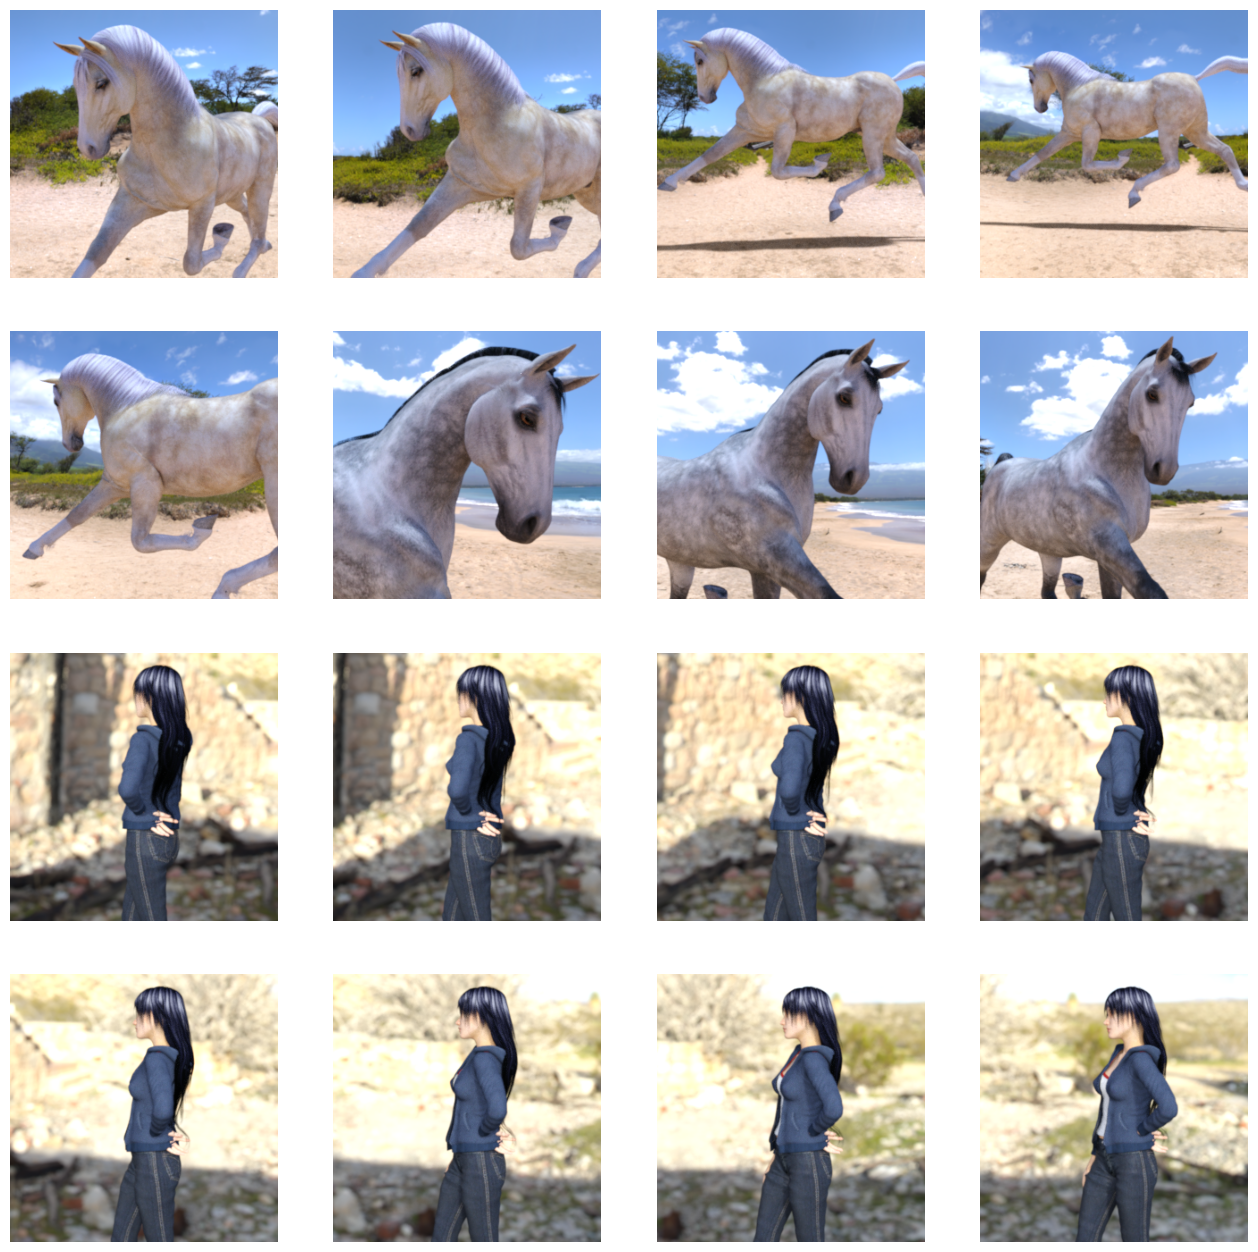

In [36]:
fig=plt.gcf()
fig.set_size_inches(ncols*4, nrows *4)
pic_index+=8
next_horse_pix=[os.path.join(train_horse_dir,fname)
                   for fname in train_horse_names[pic_index-8:pic_index]
               ]
next_human_pix=[ os.path.join(train_human_dir,fname)
                    for fname in train_human_names[pic_index-8:pic_index]
                ]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    sp=plt.subplot(nrows,ncols,i+1)
    sp.axis('Off')

    img=mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

# Building a small model from scratch

In [20]:
import tensorflow as tf

In [23]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [25]:
from tensorflow.keras.optimizers import RMSprop

In [26]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

# Data Preprocessing

Next step is to set up the data generators that will read pictures in the source folders, convert them to float32 tensors, and feed them (with their labels) to the model. You'll have one generator for the training images and one for the validation images. These generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network (i.e. It is uncommon to feed raw pixels into a ConvNet.) In this case, you will preprocess the images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras, this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory).

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1/255)
train_generator=train_datagen.flow_from_directory(
    'datasets/horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [29]:
history=model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 21s 432ms/step - loss: 0.7135 - accuracy: 0.6107
Epoch 2/15
8/8 [==============================] - 4s 508ms/step - loss: 0.7040 - accuracy: 0.6307
Epoch 3/15
8/8 [==============================] - 4s 484ms/step - loss: 0.4608 - accuracy: 0.7753
Epoch 4/15
8/8 [==============================] - 4s 495ms/step - loss: 0.4043 - accuracy: 0.8387
Epoch 5/15
8/8 [==============================] - 4s 484ms/step - loss: 0.2788 - accuracy: 0.8988
Epoch 6/15
8/8 [==============================] - 4s 474ms/step - loss: 0.1551 - accuracy: 0.9377
Epoch 7/15
8/8 [==============================] - 4s 484ms/step - loss: 1.5069 - accuracy: 0.8665
Epoch 8/15
8/8 [==============================] - 4s 474ms/step - loss: 0.1961 - accuracy: 0.9155
Epoch 9/15
8/8 [==============================] - 4s 473ms/step - loss: 0.0487 - accuracy: 0.9833
Epoch 10/15
8/8 [==============================] - 4s 546ms/step - loss: 0.1048 - accuracy: 0.9522
Epoch 11/15
8/8 [=

In [65]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

image_directory='datasets/horse-or-human/test'
image_files=os.listdir(image_directory)
images=[]
for image_file in image_files:
    image_path = os.path.join(image_directory,image_file)
    image=load_img(image_path, target_size=(300,300))
    image_array=img_to_array(image)
    image_array/=255.0
    x=np.expand_dims(image_array,axis=0)
    images=np.vstack([x])
    classes=model.predict(images,batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(image_file + 'is a human')
    else:
        print(image_file + 'is a horse')
    
    

1/1 [==============================] - 0s 16ms/step
[4.1536645e-05]
horse1.jpgis a horse
1/1 [==============================] - 0s 17ms/step
[1.6237612e-11]
horse2.jpgis a horse
1/1 [==============================] - 0s 16ms/step
[0.9992255]
horse3.jpgis a human
1/1 [==============================] - 0s 18ms/step
[0.9976808]
horse4.jpgis a human
1/1 [==============================] - 0s 18ms/step
[3.530436e-11]
horse5.jpgis a horse
1/1 [==============================] - 0s 17ms/step
[1.]
human1.jpgis a human
1/1 [==============================] - 0s 17ms/step
[0.00533864]
human2.jpgis a horse
1/1 [==============================] - 0s 17ms/step
[1.]
human3.jpgis a human
1/1 [==============================] - 0s 17ms/step
[0.6912908]
human4.jpgis a human


In [57]:
images

[array([[[168., 171., 176.],
         [173., 176., 181.],
         [170., 173., 178.],
         ...,
         [173., 176., 181.],
         [173., 176., 181.],
         [175., 178., 183.]],
 
        [[170., 173., 178.],
         [174., 177., 182.],
         [167., 170., 175.],
         ...,
         [173., 176., 181.],
         [175., 178., 183.],
         [172., 175., 180.]],
 
        [[172., 175., 180.],
         [170., 173., 178.],
         [171., 174., 179.],
         ...,
         [173., 176., 181.],
         [174., 177., 182.],
         [174., 177., 182.]],
 
        ...,
 
        [[136., 146., 155.],
         [136., 146., 155.],
         [134., 144., 153.],
         ...,
         [ 78.,  83.,  86.],
         [ 79.,  84.,  87.],
         [ 80.,  85.,  88.]],
 
        [[133., 140., 150.],
         [134., 141., 151.],
         [133., 140., 150.],
         ...,
         [ 76.,  84.,  86.],
         [ 81.,  85.,  88.],
         [ 78.,  86.,  88.]],
 
        [[129., 136., 146.],
 

In [ ]:
# load the images and check